### Naive Bayes

Naive Bayes rules are based on conditional propablity.


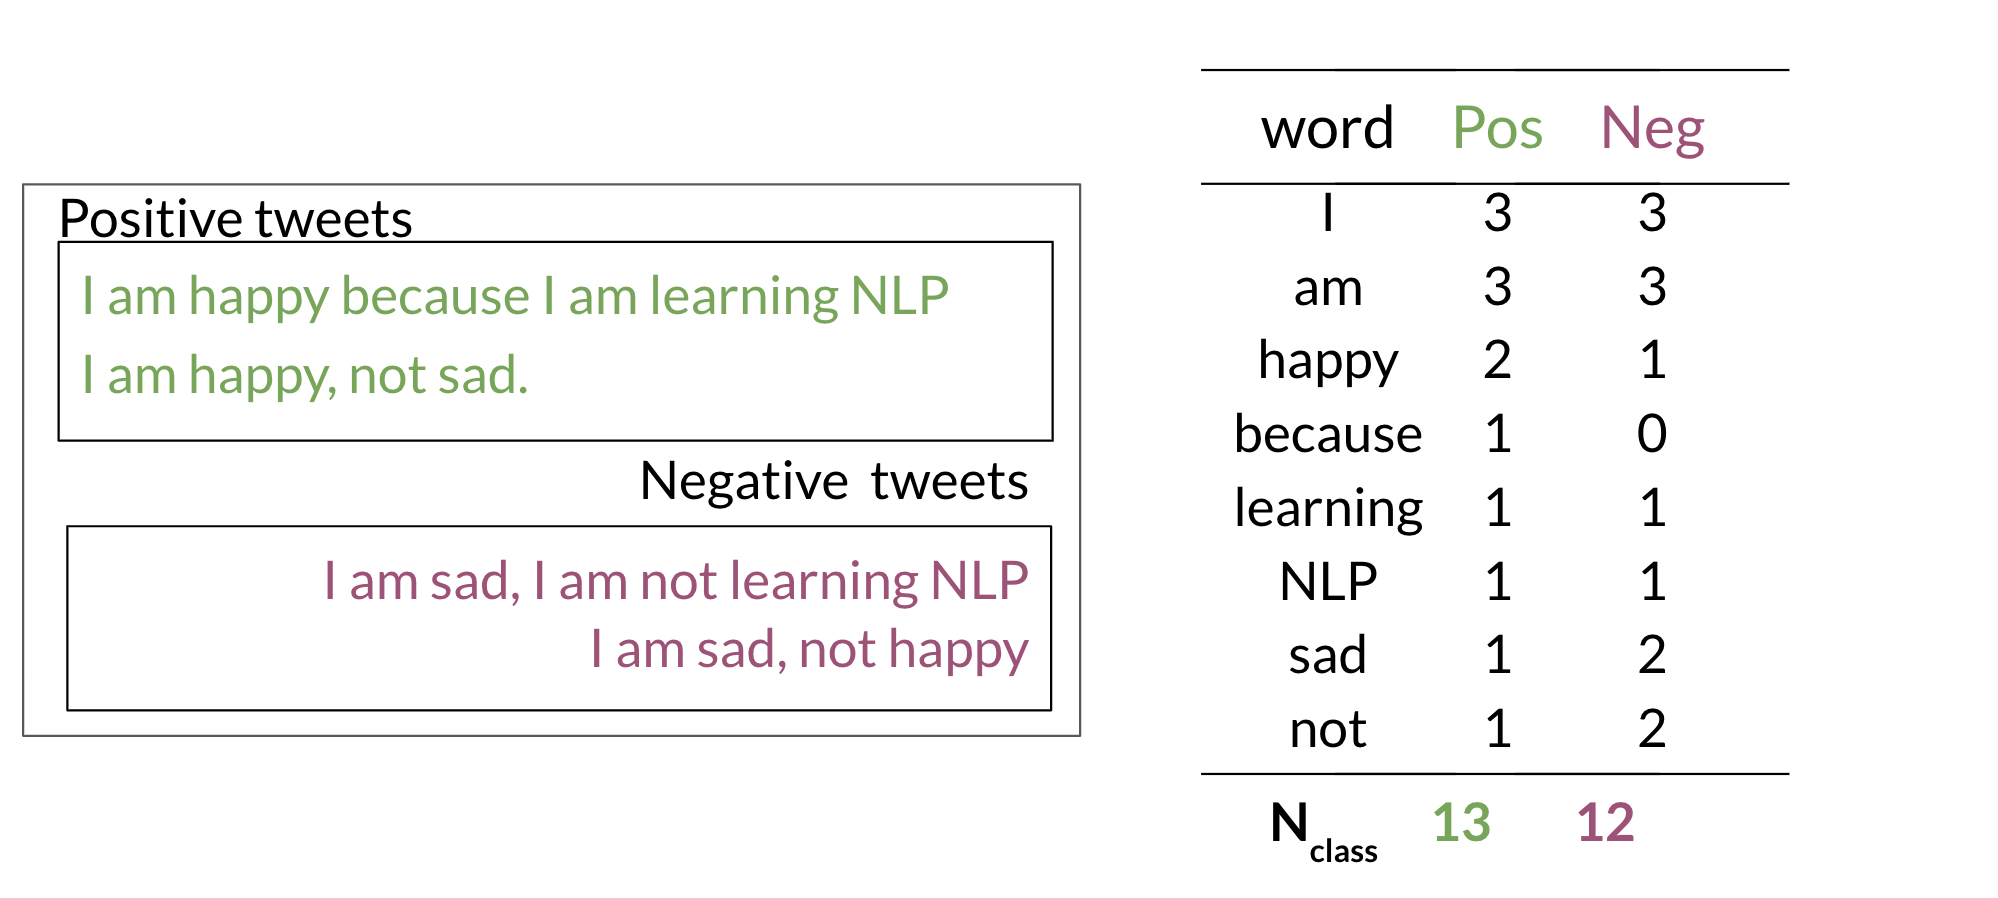
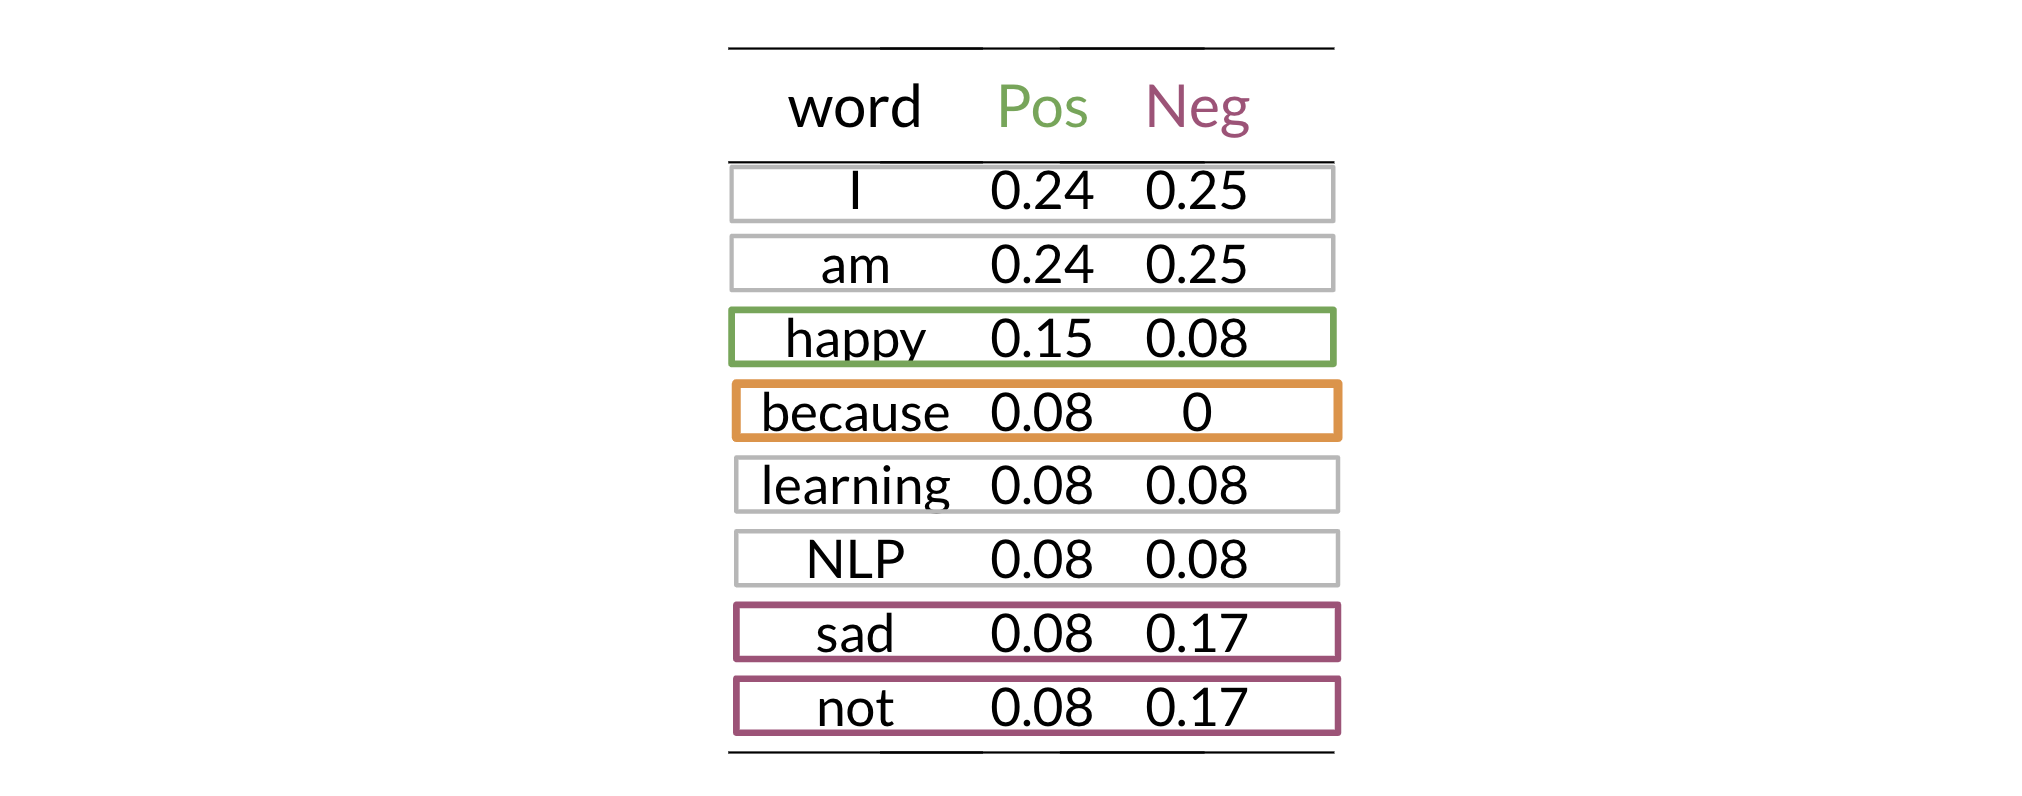

Positive/Negative probability for each word is a sum of this word in a positive/negative tweet sample over all words in the sample eg:

Positive:

`I am happy because I am learning NLP.
I am very happy, not sad.
We like when I am happy.`

$$ I_{word}=4 $$
$$ all_{positive words}=20 $$

$$ P(I_{word})=\frac{4}{20}=0.2 $$

Then create a table of probabilities like:

`Words (vocabulary)`: [I, am, happy, because, learning, NLP, sad, not] 

`Positive probabilities`: [0.2 0.2 0.14 0.1 0.1 0.1 0.1 0.1]

`Negative probabilities`: [0.2 0.2 0.1 0.05 0.1 0.1 0.15 0.15]

Then for a given sentence `I am happy learning NLP` calculate:

`Positive probabilities`: [`0.2` `0.2` `0.14` 0.1 `0.1` `0.1` 0.1 0.1]

`Negative probabilities`: [`0.2` `0.2` `0.1` 0.05 `0.1` `0.1` 0.15 0.15]


$$ \prod \frac{P(word|pos)}{P(word|neg)}= \frac{0.2}{0.2} \frac{0.2}{0.2} \frac{0.14}{0.1} \frac{0.1}{0.1} \frac{0.1}{0.1} = \frac{0.14}{0.1} = 1.4 >1$$

If score is `greater than 1 the sencence is positive` and if it's `lower than one negative`.

In general the equation contains also ratio of positive and negative words called LogPrior, however for the `balanced dataset it is equal to 1`.

$$ \frac{P(pos)}{P(neg)} \prod \frac{P(word|pos)}{P(word|neg)} $$

#### Baye's rule

$$ P(X|Y) = \frac{P(X\cap Y)}{P(Y)} = \frac{P(Y|X)P(X)}{P(Y)}$$


For NLP we take X as probability that tweet is positive and Y meaning it contains cetrain word, therefore conditional probability means tweet X being positive given it contains word Y.

#### Laplacian Smoothing

$$ P(w_i|class) = \frac {freq(w_i,class)}{N_{class}} $$

Words that do not appear in the training data would hav eprobalitity 0. 
To avoid this we add smoothing:

$$ P(w_i|class) = \frac {freq(w_i,class)+1}{N_{class}+V} $$

$ N_{class}: $ frequency of all words in class

$ V: $ number of unique words in vocabulary

#### Log Likelihood

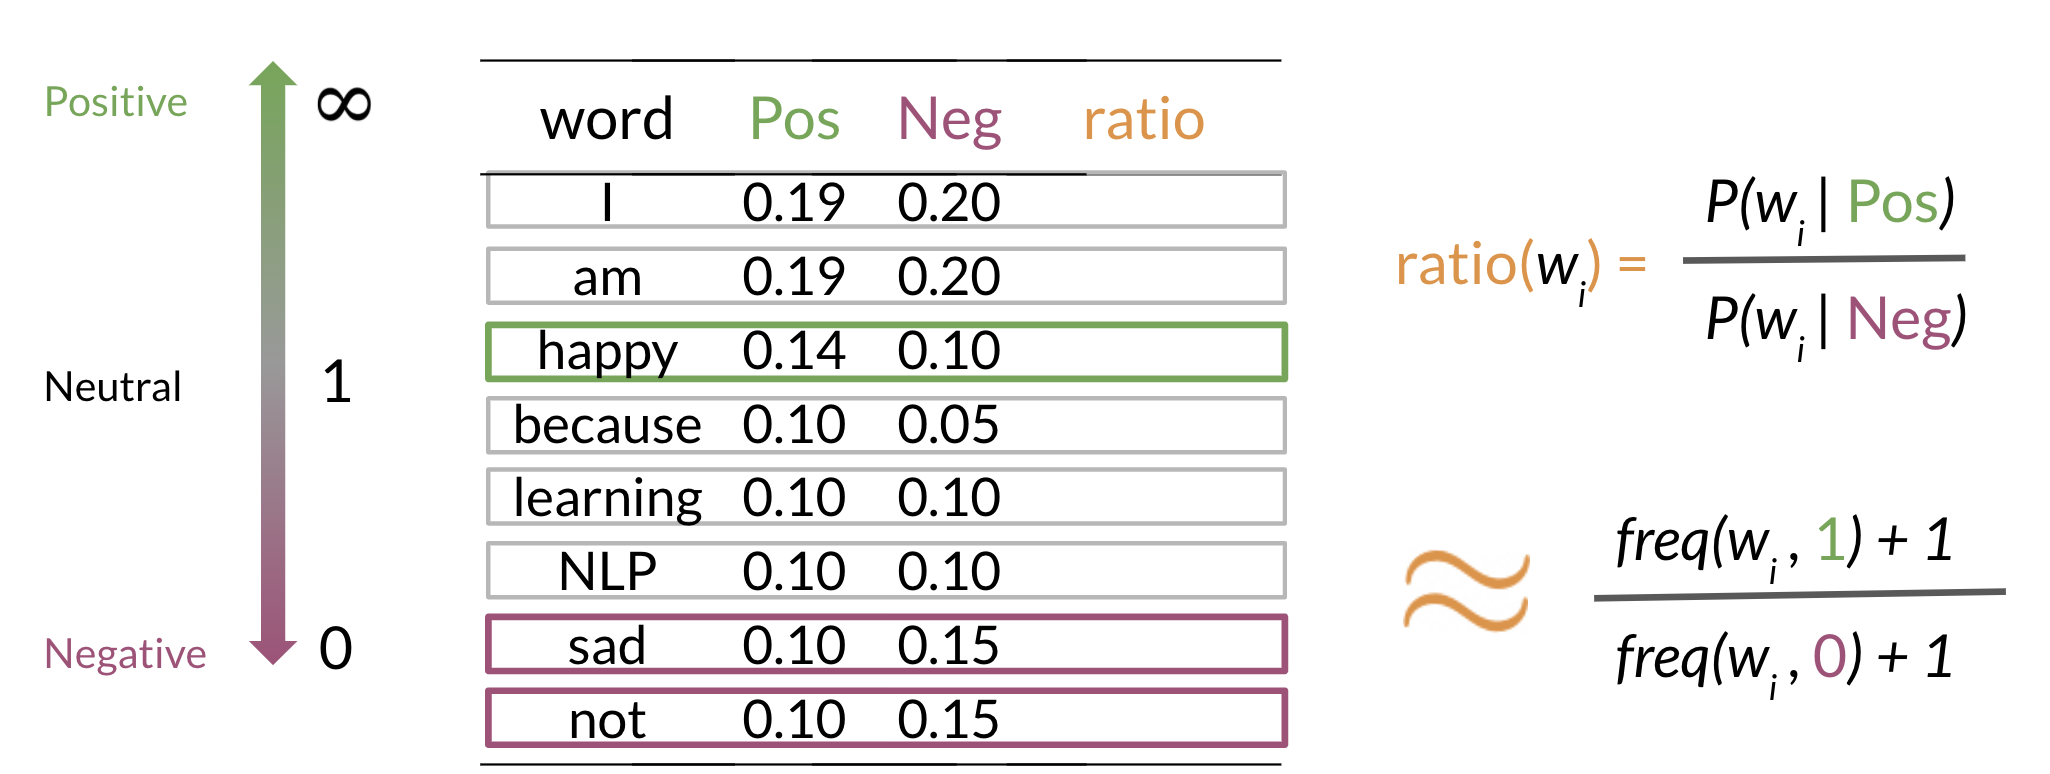
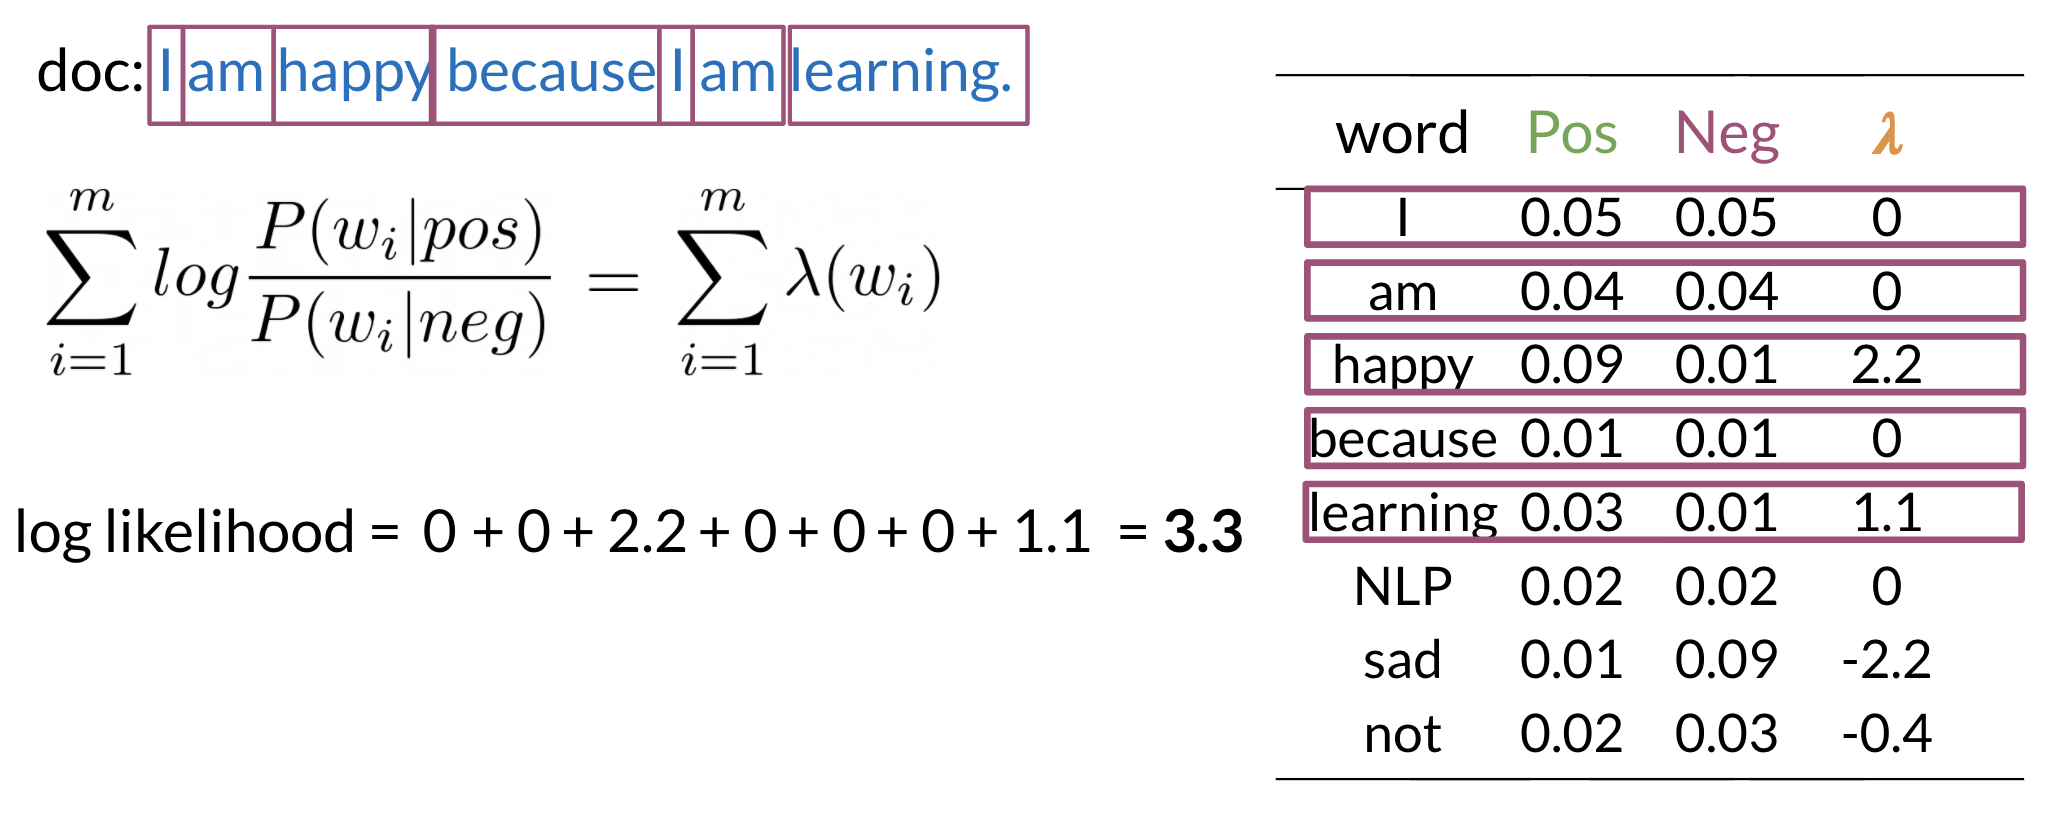

It is a way to store the values as sums rather than products due to difficulty in storing very small numbers.

`We use it just beacouse it is easier. Just take the ratio of positive and negative probability and take a ln of it`

$$ log(a \times b) = log(a) + log(b) $$

$$ \log{(\frac{P(pos)}{P(neg)} \prod \frac{P(word|pos)}{P(word|neg)})} = \log{(\frac{P(pos)}{P(neg)})} +  \sum log(\frac{P(word|pos)}{P(word|neg)})$$

$$ \lambda(w_{i}) = \log{(\frac{P(w_{i}|pos)}{P(w_{i}|neg)})} $$

$$ \sum log(\frac{P(w_i|pos)}{P(w_i|neg)}) = \sum{\lambda(w_i)} $$

`Just take the ratio of positive and negative probability and take a ln of it.`

`Then as `$ log(a \times b) = log(a) + log(b) $` you can simply add them.`

For neutral words, that have the same pos and neg probability, the log is 0, for `positive ones its value is positive`, and for `negative the value is negative`.

Vocabulary: [I, am, happy, because, learning, NLP, sad, not]

Positive: [0.05, 0.04, `0.09`, 0.01, `0.03`, 0.02, 0.01, 0.02]

Negative: [0.05, 0.04, `0.01`, 0.01, `0.01`, 0.02, 0.09, 0.03]

for snetence: `I am happy because I am learning NLP` we have:

$$ ratio=\frac{P(word|pos)}{P(word|neg)} \qquad \lambda(word)=ln(ratio) $$

Then:

$$ \lambda(happy)=ln(\frac{0.09}{0.01}) = 2.197 \qquad \lambda(learning)=ln(\frac{0.03}{0.01}) = 1.098 $$

$$ loglikelihood = 0+0+2.2+0+0+0+1.1=3.3 >0  -> positive $$

`For loglikelihood the decision point is now 0 instead of 1 as for likelihood ratio as we take logarythm of it!`

Naive Bayes is am method applicable for binary problem like:
- author identyfication
- spam filtering
- info retrieval
- word disambiguation

Naive Bayes is `NAIVE` beacause of its assumptions:
- the words in phrase are `independent`
- relative frequencies in corpus (imbalanced data)

---

$$ log(\frac{P(tweet|pos)}{P(tweet|neg)}) = log(P(tweet|pos)) - log(P(tweet|neg)) $$

$$ positive = log(P(tweet|pos)) = \sum{log(P(w_i|pos))} $$

$$ negative = log(P(tweet|neg)) = \sum{log(P(w_i|neg))} $$


---

## Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as Transforms
def confidence_ellipse(x,y,ax,n_std=3.0,facecolor='none',**kwargs):
    '''
    Parameters:
    -----------
        x: array (n,)
        y: array (n,)
        ax: matplotlib.axes.Axes
        n_std: float, number od std to determine radiuses
        
    Returns:
    --------
        matplotlib.patches.Eclipse
    '''
    if x.size != y.size:
        raise ValueError('x must be of the same size as y')
        
    cov=np.cov(x,y)
    pearson=cov[0,1]/np.sqrt(cov[0,0]*cov[1,1])
    ell_radius_x=np.sqrt(1+pearson)
    ell_radius_y=np.sqrt(1-pearson)
    ellipse=Ellipse((0,0),width=ell_radius_x*2,height=ell_radius_y*2,facecolor=facecolor,**kwargs)
    
    scale_x=np.sqrt(cov[0,0])*n_std
    mean_x=np.mean(x)
    
    scale_y=np.sqrt(cov[1,1])*n_std
    mean_y=np.mean(y)
    
    transf=Transforms.Affine2D().rotate_deg(45).scale(scale_x,scale_y).translate(mean_x,mean_y)
    ellipse.set_transform(transf+ax.transData)
    
    return ax.add_patch(ellipse)

In [5]:
data=pd.read_csv('data/bayes_features.csv')
data.head()

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


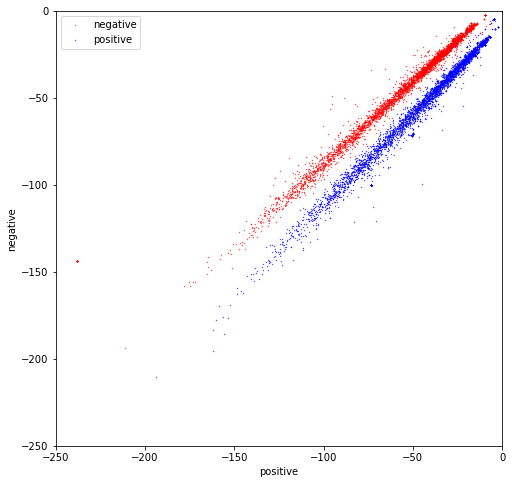

In [15]:
colors=['red','blue']
sentiments=['negative','positive']
plt.figure(figsize=(8,8))
plt.scatter(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,s=0.1,color=colors[0],label='negative')
plt.scatter(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,s=0.1,color=colors[1],label='positive')
plt.xlim(-250,0)
plt.ylim(-250,0)
plt.xlabel('positive')
plt.ylabel('negative')
plt.legend()

#### Visualization of confidence eclipses

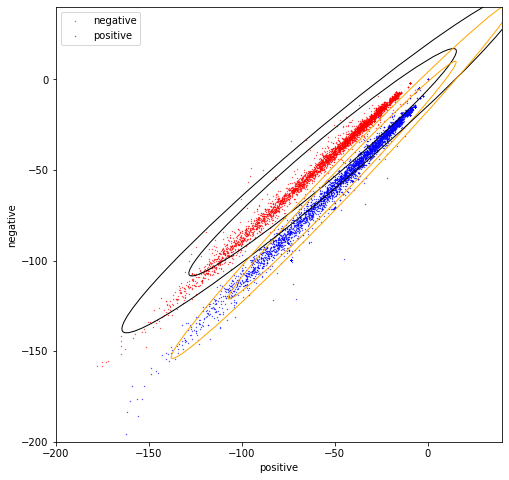

In [29]:
colors=['red','blue']
sentiments=['negative','positive']
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,s=0.1,color=colors[0],label='negative')
plt.scatter(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,s=0.1,color=colors[1],label='positive')
plt.xlim(-200,40)
plt.ylim(-200,40)
plt.xlabel('positive')
plt.ylabel('negative')
confidence_ellipse(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,ax,n_std=2,edgecolor='black')
confidence_ellipse(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,ax,n_std=2,edgecolor='orange')
confidence_ellipse(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,ax,n_std=3,edgecolor='black')
confidence_ellipse(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,ax,n_std=3,edgecolor='orange')
plt.legend()

In [36]:
data.positive[data['sentiment']==1]=data.positive/1.5-50
data.negative[data['sentiment']==1]=data.negative*1.5+50

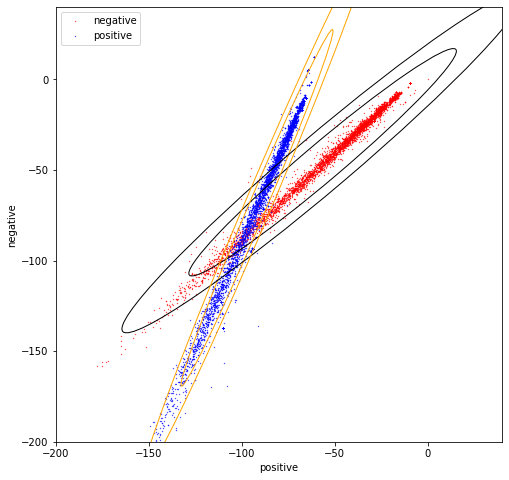

In [37]:
colors=['red','blue']
sentiments=['negative','positive']
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,s=0.1,color=colors[0],label='negative')
plt.scatter(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,s=0.1,color=colors[1],label='positive')
plt.xlim(-200,40)
plt.ylim(-200,40)
plt.xlabel('positive')
plt.ylabel('negative')
confidence_ellipse(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,ax,n_std=2,edgecolor='black')
confidence_ellipse(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,ax,n_std=2,edgecolor='orange')
confidence_ellipse(data[data['sentiment']==0].positive,data[data['sentiment']==0].negative,ax,n_std=3,edgecolor='black')
confidence_ellipse(data[data['sentiment']==1].positive,data[data['sentiment']==1].negative,ax,n_std=3,edgecolor='orange')
plt.legend()

---

## Naive Bayes classifier

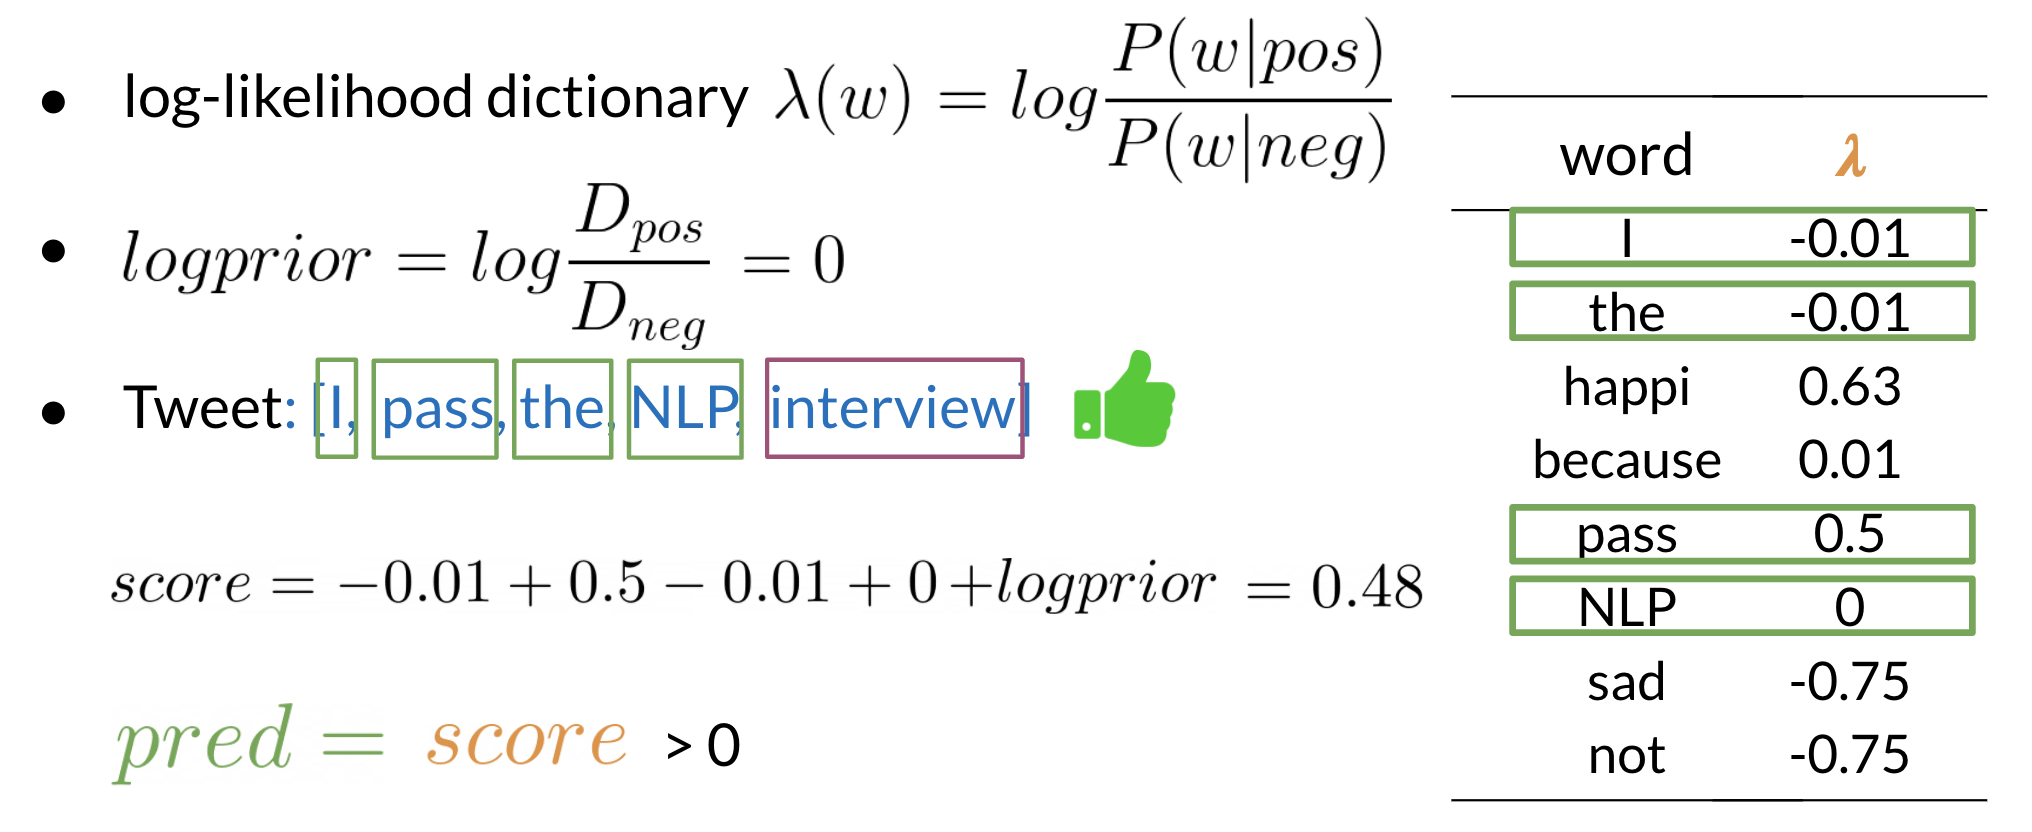

In [1]:
import nltk
from nltk.corpus import stopwords, twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as getcwd
import string
import pdb
import re

#### process data

In [2]:
def process_tweet(tweet):
    """
    Parameters:
    -----------
        tweet: string
        
    Returns:
    --------
        tweet_stem: list of stemmed words in tweet
    """
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    stopwords_english=stopwords.words('english')
    stemmer=PorterStemmer()
    
    tweet=re.sub(r'https?://[^\s\n\r]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet_tokenized=tokenizer.tokenize(tweet)
    
    tweet_clean=[]
    for word in tweet_tokenized:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(word)
    
    tweet_stem=[]
    for word in tweet_clean:
        stem_word=stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [3]:
def build_freqs(tweets,ys):
    """
    Parameters:
    -----------
        tweets: list of tweets
    
        ys: m x 1 array with the sentiment label (1 or 0)
    
    Returns:
    --------
        freqs: dict mapping each (word,sentiment) pair to its frequency
    """
    yslist=np.squeeze(ys).tolist()
    freqs={}
    for y,tweet in zip(yslist,tweets):
        for word in process_tweet(tweet):
            pair=(word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [4]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')
tweets=positive_tweets+negative_tweets

train_pos=positive_tweets[:4000]
train_neg=negative_tweets[:4000]
test_pos=positive_tweets[4000:]
test_neg=negative_tweets[4000:]

train_x=train_pos+train_neg
test_x=test_pos+test_neg

train_y=np.append(np.ones((len(train_pos),1)),np.zeros((len(train_neg),1)),axis=0)
test_y=np.append(np.ones((len(test_pos),1)),np.zeros((len(test_neg),1)),axis=0)

In [6]:
freqs=build_freqs(train_x,train_y)

#### train Naive Bayes

In [7]:
def train_naive_bayes(freqs,train_x,train_y):
    '''
    Parameters:
    -----------
        freqs: dict of word frequencies for each tuple (word,label)
        train_x: list of tweets
        train_y: list of labels
    
    Returns:
    --------
        logprior: the log prior
        loglikelihood: loglikelihood of Naiv Bayes equation
    '''
    loglikelihood={}
    logprior=0
    
    vocab=[i for i,j in freqs.keys()]
    vocab=set(vocab)
    V=len(vocab)
    
    N_pos=N_neg=0
    
    for pair in freqs.keys():
        if pair[1]>0:
            N_pos+=freqs[pair] # number of all positive words
        else:
            N_neg+=freqs[pair] # number of all negative words
    D=len(train_x)
    D_pos=np.sum(train_y) # number of all positive tweets
    D_neg=D-D_pos # number of all negative tweets
    logprior=np.log(D_pos/D_neg)
    
    for word in vocab:
        freq_pos=freqs.get((word,1),0)
        freq_neg=freqs.get((word,0),0)
        
        p_w_pos=(freq_pos+1)/(N_pos+V)
        p_w_neg=(freq_neg+1)/(N_neg+V)
        
        loglikelihood[word]=np.log(p_w_pos/p_w_neg)
    
    return logprior, loglikelihood

In [21]:
logprior, loglikelihood=train_naive_bayes(freqs,train_x,train_y)
print(f'logprior: {logprior}')
print(f'loglikelihood: {len(loglikelihood)}')

logprior: 0.0
loglikelihood: 9160


#### use model

In [9]:
def naive_bayes_predict(tweet,logprior,loglikelihood):
    '''
    Parameters:
    -----------
        tweet: string
        logprior: int
        loglikelihood dict of words mapped to numbers
    
    Returns:
    --------
        p: sum of all likelihoods of each word in tweet + logprior
    '''
    words=process_tweet(tweet)
    likelihoods=0
    for word in words:
        likelihoods+=loglikelihood.get(word,0)
    p=logprior+likelihoods
    return p

In [10]:
tweet='She smiled'
p=naive_bayes_predict(tweet,logprior,loglikelihood)
print(p)

1.557658105004371


In [11]:
tweet='He cried'
p=naive_bayes_predict(tweet,logprior,loglikelihood)
print(p)

-1.6203957253435746


#### test model

In [38]:
def test_naive_bayes(test_x,test_y,logprior,loglikelihood):
    '''
    Parameters:
    -----------
        train_x: list of tweets
        train_y: list of tweet labels
        logprior: int logprior
        loglikelihood: dict of loglikelihoods for each word
    
    Returns:
    --------
        accuracy: accuracy of Naive Bayes model
    '''
    p=0
    predictions=[]
    for tweet in test_x:
        p=naive_bayes_predict(tweet,logprior,loglikelihood)
        if p>0:
            predictions.append([1])
        else:
            predictions.append([0])
    error=(abs(predictions-test_y)).mean()
    accuracy=(predictions==test_y).mean()
    return accuracy,predictions

In [41]:
acc,pred=test_naive_bayes(test_x,test_y,logprior,loglikelihood)
acc

0.9955

In [47]:
freqs.get('happi',1)

1

In [50]:
def get_ratio(freqs,word):
    pos_neg_ratio={'positive':0, 'negative':0, 'ratio': 0}
    pos_neg_ratio['positive']=freqs.get((word,1),0)
    pos_neg_ratio['negative']=freqs.get((word,0),0)
    pos_neg_ratio['ratio']=(pos_neg_ratio['positive']+1)/(pos_neg_ratio['negative']+1)
    return pos_neg_ratio

In [51]:
get_ratio(freqs,'happi')

{'positive': 162, 'negative': 18, 'ratio': 8.578947368421053}

In [55]:
def get_words_by_treshold(freqs,label,treshold):
    word_list={}
    for key in freqs.keys():
        word=key[0]
        pos_neg_ratio=get_ratio(freqs,word)
        if label==1 and pos_neg_ratio['ratio']>=treshold:
            word_list[word]=pos_neg_ratio
        elif label==0 and pos_neg_ratio['ratio']<=treshold:
            word_list[word]=pos_neg_ratio
    
    return word_list

In [56]:
get_words_by_treshold(freqs,0,0.05)

{':(': {'positive': 1, 'negative': 3675, 'ratio': 0.000544069640914037},
 ':-(': {'positive': 0, 'negative': 386, 'ratio': 0.002583979328165375},
 'zayniscomingbackonjuli': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '26': {'positive': 0, 'negative': 20, 'ratio': 0.047619047619047616},
 '>:(': {'positive': 0, 'negative': 43, 'ratio': 0.022727272727272728},
 'lost': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '♛': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 '》': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 'beli̇ev': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'wi̇ll': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'justi̇n': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｓｅｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｍｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776}}

In [57]:
get_words_by_treshold(freqs,1,10)

{'followfriday': {'positive': 23, 'negative': 0, 'ratio': 24.0},
 'commun': {'positive': 27, 'negative': 1, 'ratio': 14.0},
 ':)': {'positive': 2960, 'negative': 2, 'ratio': 987.0},
 'flipkartfashionfriday': {'positive': 16, 'negative': 0, 'ratio': 17.0},
 ':d': {'positive': 523, 'negative': 0, 'ratio': 524.0},
 ':p': {'positive': 105, 'negative': 0, 'ratio': 106.0},
 'influenc': {'positive': 16, 'negative': 0, 'ratio': 17.0},
 ':-)': {'positive': 552, 'negative': 0, 'ratio': 553.0},
 "here'": {'positive': 20, 'negative': 0, 'ratio': 21.0},
 'youth': {'positive': 14, 'negative': 0, 'ratio': 15.0},
 'bam': {'positive': 44, 'negative': 0, 'ratio': 45.0},
 'warsaw': {'positive': 44, 'negative': 0, 'ratio': 45.0},
 'shout': {'positive': 11, 'negative': 0, 'ratio': 12.0},
 ';)': {'positive': 22, 'negative': 0, 'ratio': 23.0},
 'stat': {'positive': 51, 'negative': 0, 'ratio': 52.0},
 'arriv': {'positive': 57, 'negative': 4, 'ratio': 11.6},
 'glad': {'positive': 41, 'negative': 2, 'ratio': 14